<a href="https://colab.research.google.com/github/seelamsahith/trafficlight/blob/master/trafficlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os

In [ ]:
import glob

In [ ]:
!pip install ipython
import IPython
from IPython.display import Image,display

In [ ]:
!nvidia-smi

Mon Jul  3 05:51:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
HOME=os.getcwd()

In [ ]:
print(HOME)

/content


In [ ]:
#installing ultralytics and its packages
!git clone https://github.com/MuhammadMoin97/ultralytics.git

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [ ]:
%cd {HOME}/ultralytics

/content/ultralytics


In [ ]:
!pip install -e '.[dev]'

Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3
  Running setup.py develop for ultralytics


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
HOME ='/content/ultralytics/ultralytics/yolo/v8/detect'

In [ ]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8NNohzTIMFFhVLpTF6oF")
project = rf.workspace("wawan-pradana").project("cinta_v2")
dataset = project.version(1).download("yolov8")


/content/ultralytics/ultralytics/yolo/v8/detect
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to cinTA_v2-1 in yolov8:: 100%|██████████| 4806/4806 [00:01<00:00, 4247.48it/s]


In [ ]:
%cd {HOME}

/content/ultralytics/ultralytics/yolo/v8/detect


In [ ]:
%cd {dataset.location}

/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1


In [ ]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=80 imgsz=640

/content/ultralytics/ultralytics/yolo/v8/detect
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.

In [ ]:
!ls {HOME}/runs/detect/train3

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch9240.jpg
events.out.tfevents.1688363818.e9b6493a951f.3318.0  train_batch9241.jpg
F1_curve.png					    train_batch9242.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


/content/ultralytics/ultralytics/yolo/v8/detect


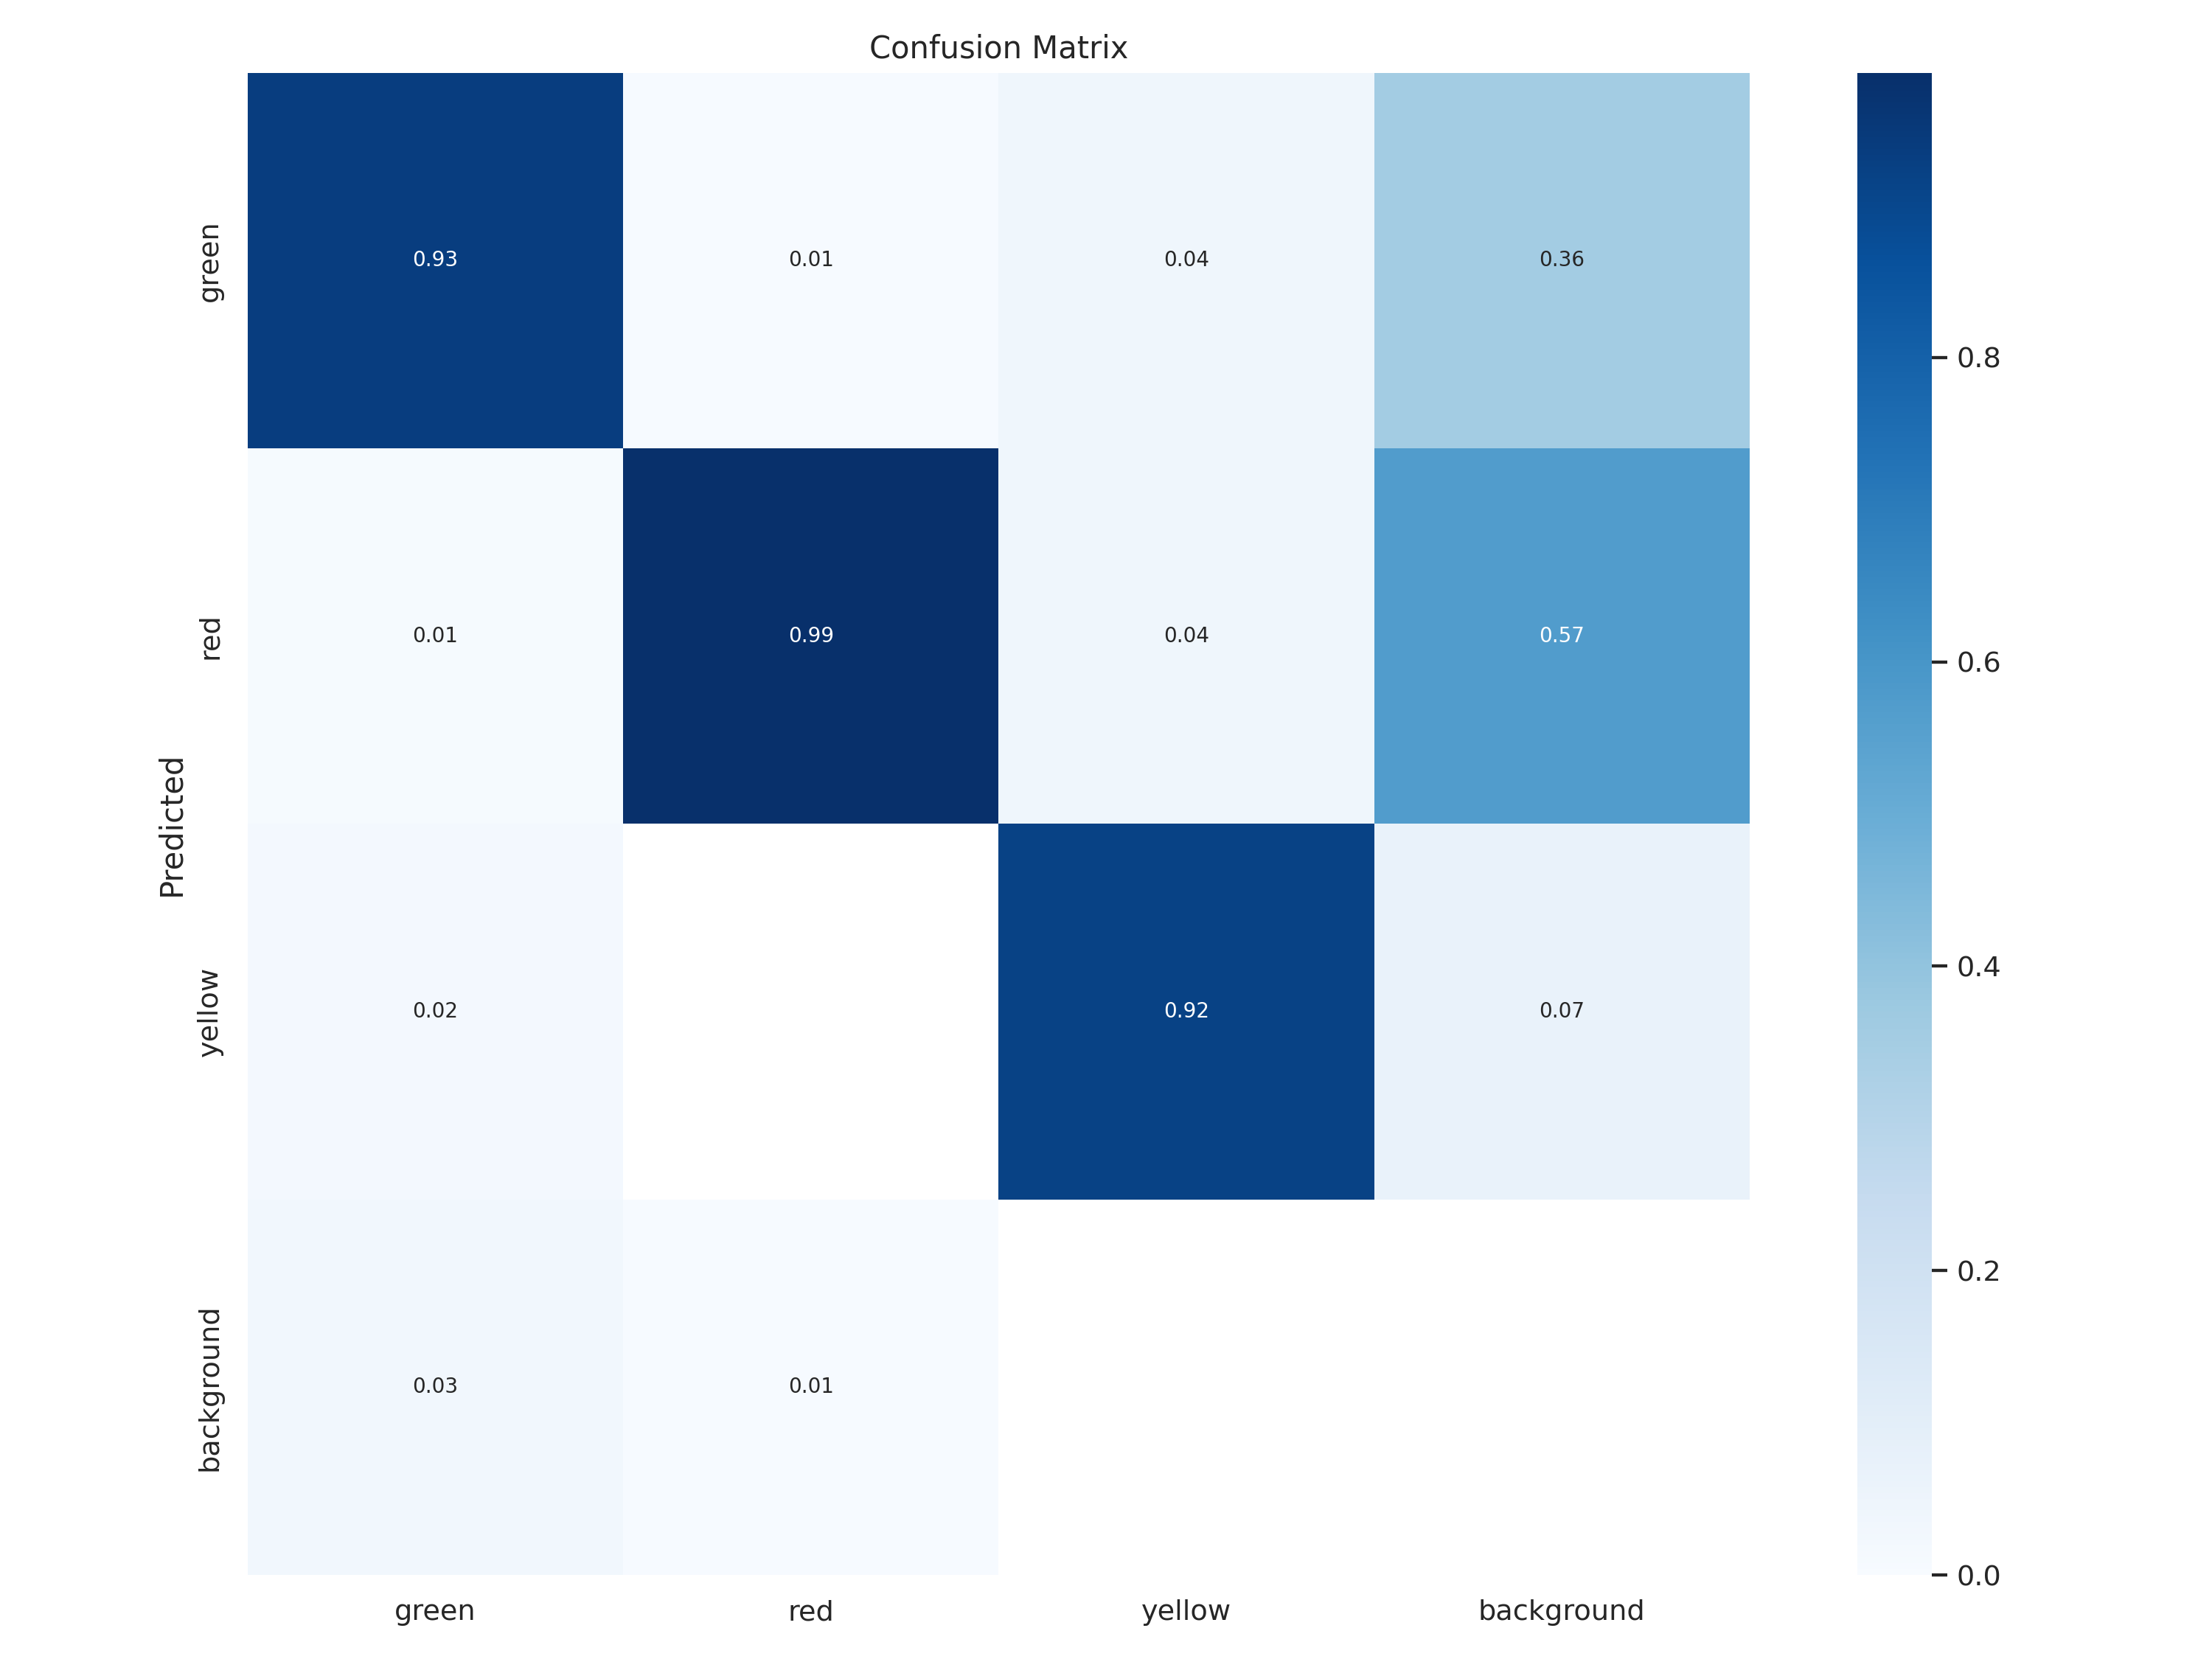

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png',width=900)

/content/ultralytics/ultralytics/yolo/v8/detect


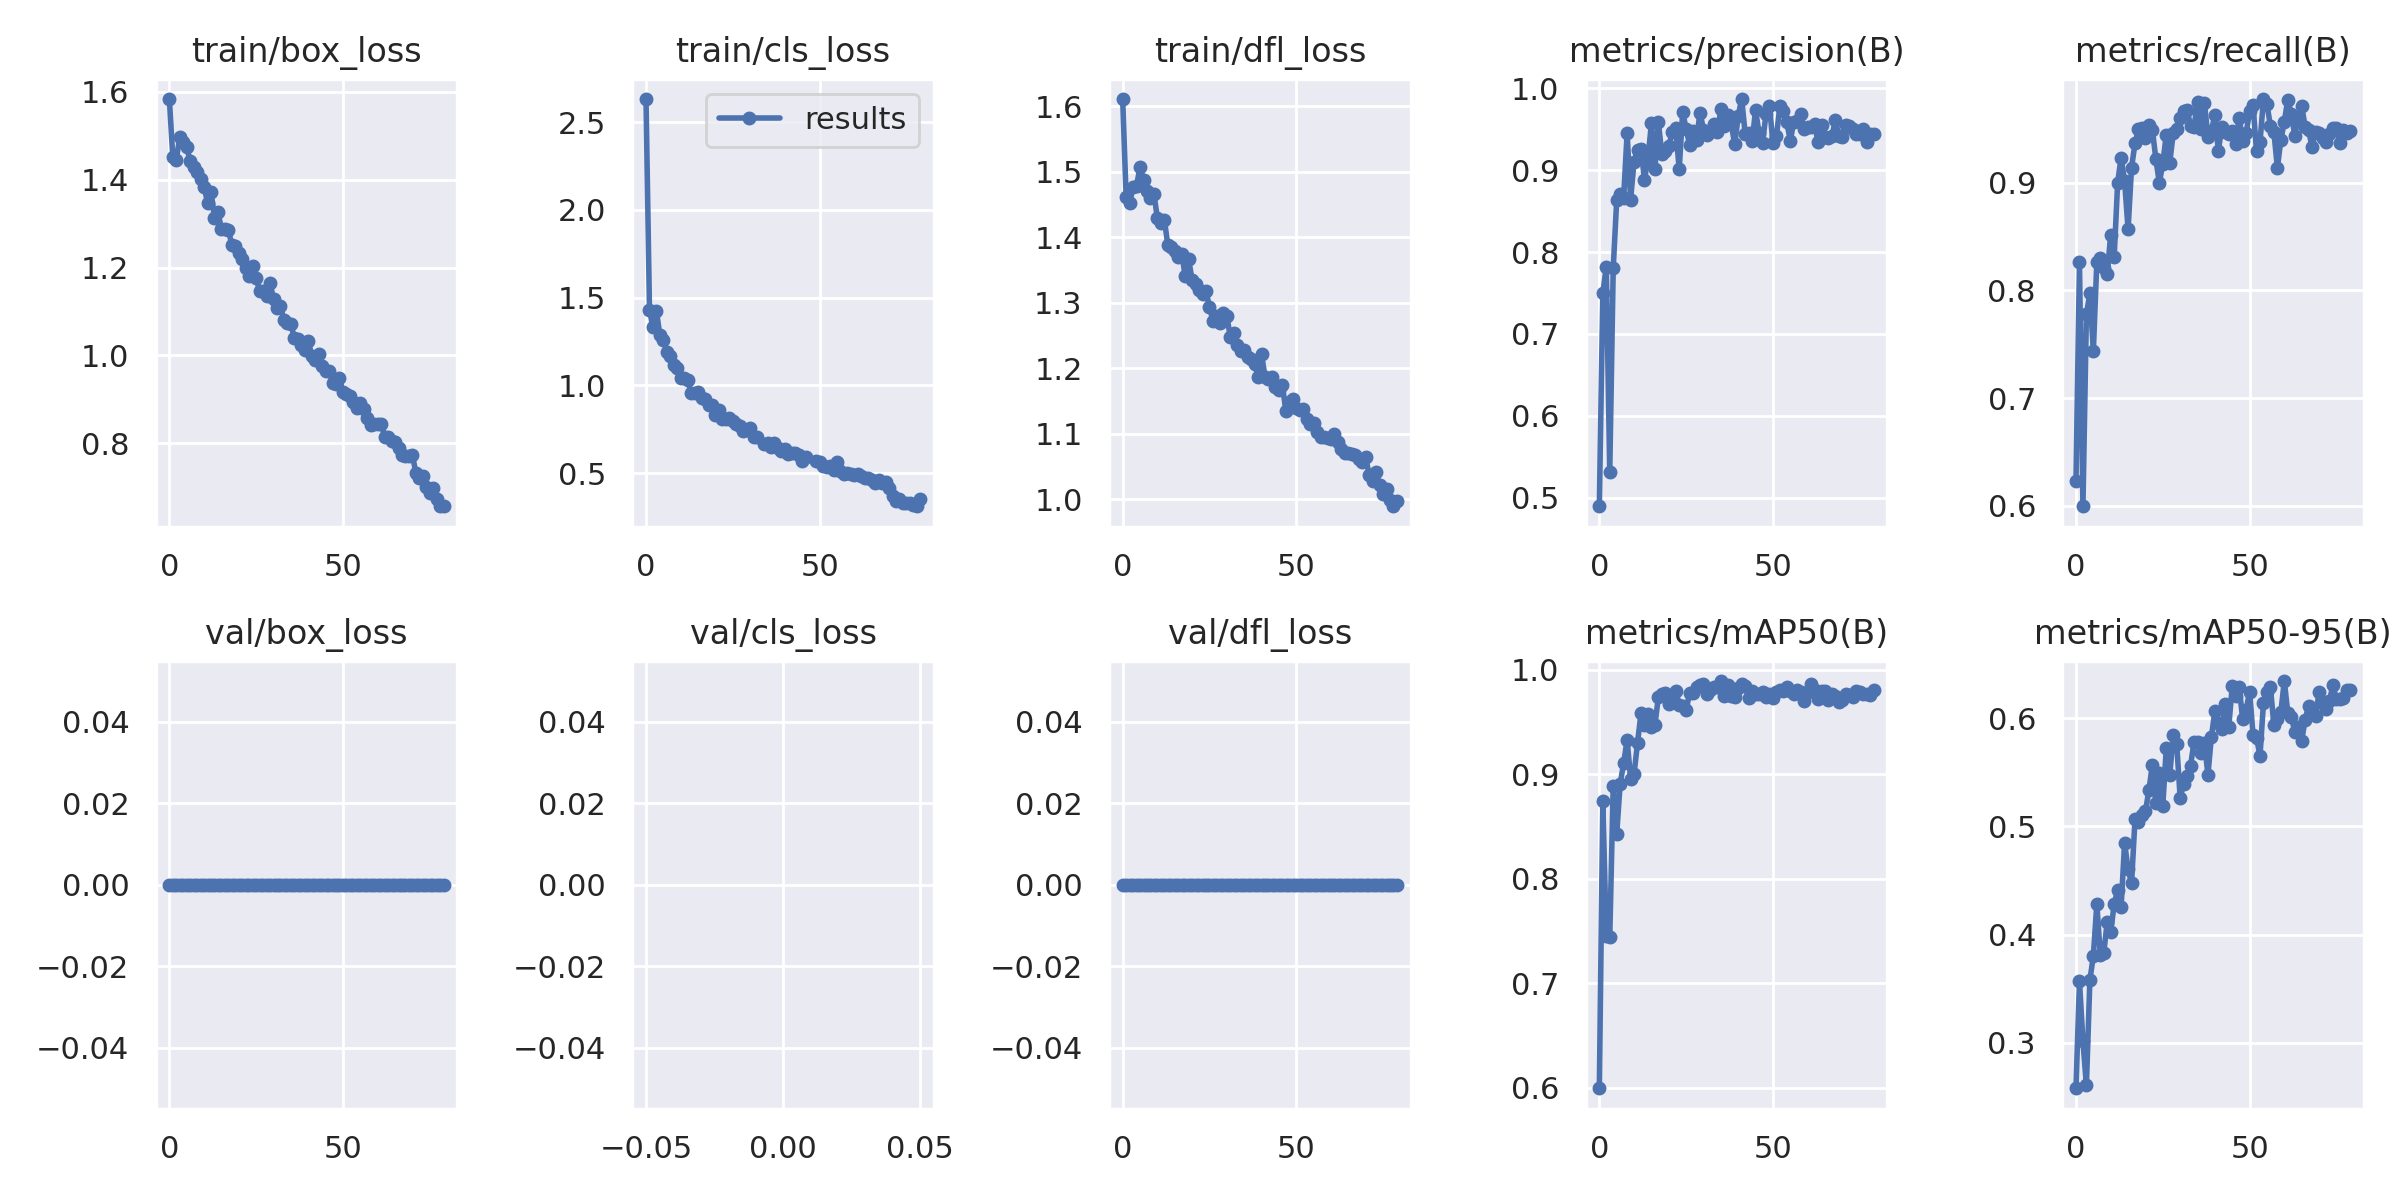

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png',width=600)

In [ ]:
%cd {HOME}
! python val.py model='{HOME}/runs/detect/train3/weights/best.pt' data={dataset.location}/data.yaml source='/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images'

/content/ultralytics/ultralytics/yolo/v8/detect
2023-07-03 09:00:04.379589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 09:00:05.380128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:11<00:00,  1.14it/s]
                   all        200        

In [ ]:
%cd {HOME}
!python predict.py model='{HOME}/runs/detect/train3/weights/best.pt' source='vid.mp4' conf=0.45

/content/ultralytics/ultralytics/yolo/v8/detect
2023-07-03 09:00:41.644340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 09:00:42.592501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/428) /content/ultralytics/ultralytics/yolo/v8/detect/vid.mp4: 384x640 1 red, 66.8ms
video 1/1 (2/428) /content/ultralytics/ultralytics/yolo/v8/detect/vid.mp4: 384x640 1 red, 40.9ms
video 1/1 (3/428) /content/ultralytics/ultralytics/yolo/v8/detect/vid.mp4: 384x640 1 red, 40.9ms
video 1/1 (4/428) /content/ultralytics/

In [ ]:
!ffmpeg -i {"/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train10/vid.mp4"} -vcodec libx264 {"final11.mp4"}

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e